In [1]:
import numpy as np 
import pandas as pd 
import os
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='bs4')

import re
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup

lemmatizer = WordNetLemmatizer()


from collections import namedtuple

from string import punctuation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, auc, classification_report

sns.set(color_codes=True)

In [2]:
#pip install tensorflow==2.0.0-beta1 


In [3]:
import tensorflow as tf

In [4]:
train = pd.read_csv('C:/Users/YEK/Desktop/Movie/train.tsv',sep='\t')
test = pd.read_csv('C:/Users/YEK/Desktop/Movie/test.tsv',sep='\t')

In [5]:
train.shape

(156060, 4)

In [6]:
test.shape

(66292, 3)

In [7]:
train.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [8]:
train.info


<bound method DataFrame.info of         PhraseId  SentenceId  \
0              1           1   
1              2           1   
2              3           1   
3              4           1   
4              5           1   
5              6           1   
6              7           1   
7              8           1   
8              9           1   
9             10           1   
10            11           1   
11            12           1   
12            13           1   
13            14           1   
14            15           1   
15            16           1   
16            17           1   
17            18           1   
18            19           1   
19            20           1   
20            21           1   
21            22           1   
22            23           1   
23            24           1   
24            25           1   
25            26           1   
26            27           1   
27            28           1   
28            29           1   
29      

In [9]:
train.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [10]:
train.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

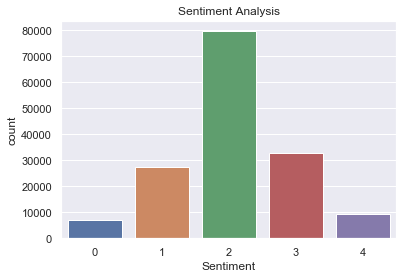

In [11]:
import seaborn as sns
ax = plt.axes()
sns.countplot(train.Sentiment,ax=ax)
ax.set_title('Sentiment Analysis')
plt.show()

In [12]:
train.ix[train.Sentiment==0,'Sentiment']="negative"
train.ix[train.Sentiment==1,'Sentiment']="somewhat negative"
train.ix[train.Sentiment==2,'Sentiment']="neutral"
train.ix[train.Sentiment==3,'Sentiment']="somewhat positive"
train.ix[train.Sentiment==4,'Sentiment']="positive"

C:\Users\YEK\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\YEK\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\YEK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imp

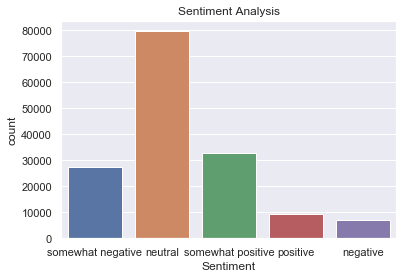

In [13]:
ax = plt.axes()
sns.countplot(train.Sentiment,ax=ax)
ax.set_title('Sentiment Analysis')
plt.show()

In [14]:
print("Proportion of positive review:", len(train[train.Sentiment=="positive"])/len(train))
print("Proportion of negative review:",len(train[train.Sentiment=="negative"])/len(train))
print("Proportion of neutral review:", len(train[train.Sentiment=="neutral"])/len(train))
print("Proportion of somewhat positive review:",len(train[train.Sentiment=="somewhat positive"])/len(train))
print("Proportion of somewhat negative review:", len(train[train.Sentiment=="somewhat negative"])/len(train))


Proportion of positive review: 0.058990132000512625
Proportion of negative review: 0.04531590413943355
Proportion of neutral review: 0.5099448929898757
Proportion of somewhat positive review: 0.21098936306548763
Proportion of somewhat negative review: 0.1747597078046905


In [15]:
reviews = train.Phrase.values
labels = train.Sentiment.values

In [16]:
def testing(i):
    if train.Sentiment[i]=="positive":
        print("positive" + "\t" + reviews[i][:90] + "...")
    elif train.Sentiment[i]=="negative":
        print("negative" + "\t" + reviews[i][:90] + "...")
    elif train.Sentiment[i]=="neutral":
        print("neutral" + "\t" + reviews[i][:90] + "...")
    elif train.Sentiment[i]=="somewhat positive":
        print("somewhat positive" + "\t" + reviews[i][:90] + "...")
    elif train.Sentiment[i]=="somewhat negative":
        print("somewhat negative" + "\t" + reviews[i][:90] + "...")
    else:
        print("I have no idea" + "\t " + reviews[i][:90] + "...")

In [17]:

testing(132)
testing(13)
testing(86)
testing(156056)
testing(156057)


neutral	intrigue , betrayal , deceit and murder...
neutral	the...
neutral	of Ismail Merchant 's work...
somewhat negative	forced avuncular chortles...
somewhat positive	avuncular chortles...


In [18]:
train.tail()

,PhraseId,SentenceId,Phrase,Sentiment
156055,156056,8544,Hearst 's,neutral
156056,156057,8544,forced avuncular chortles,somewhat negative
156057,156058,8544,avuncular chortles,somewhat positive
156058,156059,8544,avuncular,neutral
156059,156060,8544,chortles,neutral


In [19]:
train.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,somewhat negative
1,2,1,A series of escapades demonstrating the adage ...,neutral
2,3,1,A series,neutral
3,4,1,A,neutral
4,5,1,series,neutral


In [20]:
testing(52)

neutral	which amounts to much of a story...


In [21]:
reviews = train.Phrase.values
labels = np.array([0 if s=="negative" else 1 if s=="somewhat negative" else 2 if s=="neutral" else 3 if s=="somewhat positive" else 4  for s in train.Sentiment.values])

In [22]:
reviews_cleaned = []
for i in range(len(reviews)):
    reviews_cleaned.append(''.join([c.lower() for c in reviews[i] if c not in punctuation]))

In [23]:
print("Before: ",reviews[156040])
print("After: ",reviews_cleaned[156040])

Before:  is darkly atmospheric , with Herrmann quietly suggesting the sadness and obsession beneath Hearst 's forced avuncular chortles .
After:  is darkly atmospheric  with herrmann quietly suggesting the sadness and obsession beneath hearst s forced avuncular chortles 


In [24]:
from collections import Counter

In [25]:
def vocabulary_reduction(reviews,min_frequency=10,polarity_cut_off=0.1):
    
    pos_count=Counter()
    samepos_count=Counter()
    neutral_count=Counter()
    neg_count=Counter()
    sameneg_count=Counter()
    total_count=Counter()
    
    for i in range(len(reviews)):
        for word in reviews[i].split():
            total_count[word]+=1
            
            if labels[i] == 0:
                neg_count[word]+=1
            elif labels[i] == 1:
                sameneg_count[word]+=1
            elif labels[i] == 2:
                neutral_count[word]+=1
            elif labels[i] == 3:
                samepos_count[word]+=1
            else:
                pos_count[word]+=1
                
    vocab_freq = []
    for word in total_count.keys():
        if total_count[word]>min_frequency:
            vocab_freq.append(word)  
    
    all_sentiment_ratio=Counter()
    vocab_all_sentiment=(set(pos_count.keys())).intersection(set(neg_count.keys()),set(sameneg_count.keys()),set(samepos_count.keys()),set(neutral_count.keys()))
    for word in vocab_all_sentiment:
        if total_count[word]>100:
            ratio = pos_count[word]/float(neg_count[word]+1)
            if ratio>1:
                all_sentiment_ratio[word] = np.log(ratio)
            else:
                all_sentiment_ratio[word] = -np.log(1/(ratio+0.01))
     
    mean_ratio = np.mean(list(all_sentiment_ratio.values()))
    
    vocab_polarity = []
    for word in all_sentiment_ratio.keys():
        if (all_sentiment_ratio[word]<(mean_ratio-polarity_cut_off)) or (all_sentiment_ratio[word]>(mean_ratio+polarity_cut_off)):
            vocab_polarity.append(word)
     
    vocab_rm_polarity = set(all_sentiment_ratio.keys()).difference(vocab_polarity)
    vocab_reduced = (set(vocab_freq)).difference(set(vocab_rm_polarity))
 
    reviews_cleaned = []
    
    for review in reviews:
        review_temp = [word for word in review.split() if word in vocab_reduced]
        reviews_cleaned.append(' '.join(review_temp))
    
    return reviews_cleaned        

In [26]:
reviews_cleaned = vocabulary_reduction(reviews_cleaned,min_frequency=0,polarity_cut_off=0)


In [27]:
text=' '.join(reviews_cleaned)
words=text.split()
all_words=Counter(words)
vocab=set(text.split(' '))

vocab_to_int={word:i for i,word in enumerate(vocab,0)}


In [28]:
print(vocab_to_int)

{'': 0, 'misfortune': 1, 'vagina': 2, 'collect': 3, 'sc2': 4, 'biblestudy': 5, 'mythmaking': 6, 'tinny': 7, 'there': 8, 'grievous': 9, 'endurance': 10, 'setup': 11, 'guessable': 12, 'berkeley': 13, 'storyteller': 14, 'lambs': 15, 'reflected': 16, 'parallels': 17, 'neighbor': 18, 'welllensed': 19, '90s': 20, 'times': 21, 'charade': 22, 'bursts': 23, 'fighting': 24, 'dire': 25, 'cape': 26, 'came': 27, 'modeled': 28, 'bloodsoaked': 29, 'reproduce': 30, 'unencouraging': 31, 'sketchiest': 32, 'curmudgeon': 33, 'bomb': 34, 'singh': 35, 'namesake': 36, 'disinterest': 37, 'ol': 38, 'donald': 39, 'paced': 40, 'lushness': 41, 'chocolate': 42, 'ragbag': 43, 'emphasising': 44, 'oleander': 45, 'meandering': 46, 'doubts': 47, 'exxon': 48, 'entertaining': 49, 'selfcaricature': 50, 'nonfiction': 51, 'extends': 52, 'mindnumbing': 53, 'curlers': 54, 'contemporary': 55, 'teenspeak': 56, 'secondguess': 57, 'surge': 58, 'partnerships': 59, 'rogers': 60, 'sub': 61, 'theme': 62, 'jonathan': 63, 'incarnation'

In [29]:
text[:1500]

'a series of escapades demonstrating the adage that what is good for the goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story a series of escapades demonstrating the adage that what is good for the goose a series a series of escapades demonstrating the adage that what is good for the goose of escapades demonstrating the adage that what is good for the goose escapades demonstrating the adage that what is good for the goose demonstrating the adage demonstrating the adage the adage that what is good for the goose that what is good for the goose what is good for the goose is good for the goose good for the goose for the goose goose is also good for the gander some of which occasionally amuses but none of which amounts to much of a story is also good for the gander some of which occasionally amuses but none of which amounts to much of a story is also also good for the gander some of which occasionally amuses but none of which amoun

In [30]:
words[:10]

['a',
 'series',
 'of',
 'escapades',
 'demonstrating',
 'the',
 'adage',
 'that',
 'what',
 'is']

In [31]:
print (all_words)

Counter({'the': 51220, 'a': 36130, 'of': 32308, 'and': 31763, 'to': 22448, 's': 17002, 'in': 13745, 'is': 13447, 'that': 12327, 'it': 11677, 'as': 8633, 'with': 7750, 'for': 7417, 'its': 7051, 'film': 6689, 'an': 6479, 'movie': 5905, 'this': 5677, 'but': 5126, 'be': 4977, 'you': 4827, 'on': 4730, 'nt': 3970, 'by': 3918, 'more': 3888, 'his': 3827, 'about': 3682, 'one': 3609, 'not': 3562, 'at': 3550, 'or': 3472, 'from': 3462, 'than': 3458, 'all': 3201, 'have': 3134, 'like': 3071, 'are': 3059, 'has': 2938, 'so': 2644, 'story': 2520, 'rrb': 2438, 'out': 2372, 'who': 2359, 'most': 2227, 'into': 2163, 'too': 2143, 'up': 2104, 'lrb': 2098, 'good': 2043, 'if': 1979, 'what': 1899, 'their': 1899, 'characters': 1882, 'much': 1862, 'no': 1801, 'can': 1769, 'i': 1768, 'your': 1753, 'time': 1747, 'comedy': 1721, 'just': 1714, 'some': 1701, 'does': 1674, 'even': 1597, 'little': 1575, 'will': 1567, 'funny': 1522, 'way': 1511, 'life': 1484, 'any': 1456, 'very': 1451, 'been': 1410, 'make': 1396, 'only':

In [32]:
def reviews_to_integer(reviews):
    reviews_to_int=[]
    for i in range(len(reviews)):
        to_int=[vocab_to_int[word] for word in reviews[i].split()]
        reviews_to_int.append(to_int)
    return reviews_to_int
reviews_to_int=reviews_to_integer(reviews_cleaned)


In [33]:
review_lengths = [len(r) for r in reviews_to_int]
print("Shortest review:",min(review_lengths))
print("Longest revies:",max(review_lengths))


Shortest review: 0
Longest revies: 48


[]

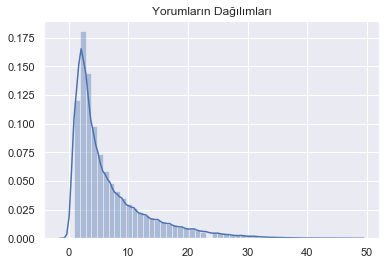

In [34]:
ax=plt.axes()
sns.distplot(review_lengths)
ax.set_title("Yorumların Dağılımları")
plt.plot()

In [35]:
pd.DataFrame(review_lengths).describe()

,0
count,156060.000000
mean,6.714962
std,6.435002
min,0.000000
25%,2.000000
50%,4.000000
75%,9.000000
max,48.000000


In [36]:
reviews_to_int = [ reviews_to_int[i] for i, l in enumerate(review_lengths) if l>0 ]
labels = [ labels[i] for i, l in enumerate(review_lengths) if l> 0 ]

In [37]:
seq_len = 200
features = np.zeros((len(reviews), seq_len), dtype=int)
for i, row in enumerate(reviews_to_int):
    features[i, -len(row):] = np.array(row)[:seq_len]

In [38]:

split_frac = 0.8
split_idx = int(len(features)*0.8)
train_x, val_x = features[:split_idx], features[split_idx:]
train_y, val_y = labels[:split_idx], labels[split_idx:]

test_idx = int(len(val_x)*0.5)
val_x, test_x = val_x[:test_idx], val_x[test_idx:]
val_y, test_y = val_y[:test_idx], val_y[test_idx:]

print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(124848, 200) 
Validation set: 	(15606, 200) 
Test set: 		(15606, 200)


In [39]:
print (features[:20,:])

[[    0     0     0 ...  8269  1278  6090]
 [    0     0     0 ... 14760  7199 12057]
 [    0     0     0 ...     0  1278 16085]
 ...
 [    0     0     0 ... 14760  7199 12057]
 [    0     0     0 ...     0     0  9386]
 [    0     0     0 ... 14760  7199 12057]]


In [522]:
lstm_size = 256
lstm_layers = 1
batch_size =54
learning_rate = 0.001

In [523]:
n_words = len(vocab_to_int)
graph = tf.Graph()
with graph.as_default():
    inputs_ = tf.placeholder(tf.int32, [None, None], name='inputs')
    labels_ = tf.placeholder(tf.int32, [None, None], name='labels')
    keep_prob = tf.placeholder(tf.float32, name='keep_prob')

In [524]:
embed_size=200


with graph.as_default():
    embedding =tf.Variable(tf.random_uniform((n_words, embed_size), -1, 1))
    embed =tf.nn.embedding_lookup(embedding,inputs_)

In [525]:
with graph.as_default():
    lstm = tf.contrib.rnn.BasicLSTMCell(lstm_size)
    drop = tf.contrib.rnn.DropoutWrapper(lstm, output_keep_prob=keep_prob)
    cell = tf.contrib.rnn.MultiRNNCell([drop] * lstm_layers)
    initial_state = cell.zero_state(batch_size, tf.float32)

In [526]:
with graph.as_default():
    outputs, final_state = tf.nn.dynamic_rnn(cell, embed,initial_state=initial_state)

In [527]:
with graph.as_default():
    predictions = tf.contrib.layers.fully_connected(outputs[:, -1], 1, activation_fn=tf.sigmoid)
    cost = tf.losses.mean_squared_error(labels_, predictions)
    
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

In [528]:
with graph.as_default():
    correct_pred = tf.equal(tf.cast(tf.round(predictions), tf.int32), labels_)
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [529]:
def get_batches(x,y,batch_size=100):
    n_batches=len(x)
    x, y =x[:n_batches*batch_size],y[:n_batches*batch_size]
    for ii in range(0,len(x),batch_size):
          yield x[ii:ii+batch_size], y[ii:ii+batch_size]

In [530]:
epochs = 5

with graph.as_default():
    saver = tf.train.Saver()

with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    iteration = 1
    for e in range(epochs):
        state = sess.run(initial_state)
        
        for ii, (x, y) in enumerate(get_batches(train_x, train_y, batch_size), 1):
                        
            y = np.array(y)
            
            feed = {inputs_: x,
                    labels_: y[:, None],
                    keep_prob: 0.5,
                    initial_state: state}
            loss, state, _ = sess.run([cost, final_state, optimizer], feed_dict=feed)
            
            if iteration%5==0:
                print("Epoch: {}/{}".format(e, epochs),
                      "Iteration: {}".format(iteration),
                      "Train loss: {:.3f}".format(loss))

            if iteration%25==0:
                val_acc = []
                val_state = sess.run(cell.zero_state(batch_size, tf.float32))
                for x, y in get_batches(val_x, val_y, batch_size):
                    y = np.array(y)
                    feed = {inputs_: x,
                            labels_: y[:, None],
                            keep_prob: 1,
                            initial_state: val_state}
                    batch_acc, val_state = sess.run([accuracy, final_state], feed_dict=feed)
                    val_acc.append(batch_acc)
                print("Val acc: {:.3f}".format(np.mean(val_acc)))
            iteration +=1
    saver.save(sess, "checkpoints/sentiment.ckpt")

Epoch: 0/5 Iteration: 5 Train loss: 1.102
Epoch: 0/5 Iteration: 10 Train loss: 1.556
Epoch: 0/5 Iteration: 15 Train loss: 1.185
Epoch: 0/5 Iteration: 20 Train loss: 1.482
Epoch: 0/5 Iteration: 25 Train loss: 3.908
Val acc: 0.179
Epoch: 0/5 Iteration: 30 Train loss: 2.074
Epoch: 0/5 Iteration: 35 Train loss: 1.463
Epoch: 0/5 Iteration: 40 Train loss: 1.500
Epoch: 0/5 Iteration: 45 Train loss: 1.741
Epoch: 0/5 Iteration: 50 Train loss: 1.907
Val acc: 0.179
Epoch: 0/5 Iteration: 55 Train loss: 0.815
Epoch: 0/5 Iteration: 60 Train loss: 2.741
Epoch: 0/5 Iteration: 65 Train loss: 2.407
Epoch: 0/5 Iteration: 70 Train loss: 1.574
Epoch: 0/5 Iteration: 75 Train loss: 1.185
Val acc: 0.179
Epoch: 0/5 Iteration: 80 Train loss: 1.463
Epoch: 0/5 Iteration: 85 Train loss: 1.352
Epoch: 0/5 Iteration: 90 Train loss: 1.648
Epoch: 0/5 Iteration: 95 Train loss: 1.630
Epoch: 0/5 Iteration: 100 Train loss: 0.852
Val acc: 0.179
Epoch: 0/5 Iteration: 105 Train loss: 0.870
Epoch: 0/5 Iteration: 110 Train loss

Val acc: 0.179
Epoch: 0/5 Iteration: 880 Train loss: 2.426
Epoch: 0/5 Iteration: 885 Train loss: 1.463
Epoch: 0/5 Iteration: 890 Train loss: 2.204
Epoch: 0/5 Iteration: 895 Train loss: 1.093
Epoch: 0/5 Iteration: 900 Train loss: 1.315
Val acc: 0.179
Epoch: 0/5 Iteration: 905 Train loss: 2.074
Epoch: 0/5 Iteration: 910 Train loss: 2.759
Epoch: 0/5 Iteration: 915 Train loss: 1.167
Epoch: 0/5 Iteration: 920 Train loss: 1.963
Epoch: 0/5 Iteration: 925 Train loss: 2.130
Val acc: 0.179
Epoch: 0/5 Iteration: 930 Train loss: 2.389
Epoch: 0/5 Iteration: 935 Train loss: 1.870
Epoch: 0/5 Iteration: 940 Train loss: 1.611
Epoch: 0/5 Iteration: 945 Train loss: 0.870
Epoch: 0/5 Iteration: 950 Train loss: 1.648
Val acc: 0.179
Epoch: 0/5 Iteration: 955 Train loss: 1.463
Epoch: 0/5 Iteration: 960 Train loss: 1.204
Epoch: 0/5 Iteration: 965 Train loss: 1.370
Epoch: 0/5 Iteration: 970 Train loss: 2.000
Epoch: 0/5 Iteration: 975 Train loss: 1.519
Val acc: 0.179
Epoch: 0/5 Iteration: 980 Train loss: 1.500
E

KeyboardInterrupt: 

In [ ]:
test_acc = []
with tf.Session(graph=graph) as sess:
    saver.restore(sess, tf.train.latest_checkpoint('/output/checkpoints'))
    test_state = sess.run(cell.zero_state(batch_size, tf.float32))
    for ii, (x, y) in enumerate(get_batches(test_x, test_y, batch_size), 1):
        y=np.array(y)
        feed = {inputs_: x,
                labels_: y[:, None],
                keep_prob: 1,
                initial_state: test_state}
        batch_acc, test_state = sess.run([accuracy, final_state], feed_dict=feed)
        test_acc.append(batch_acc)
    print("Test accuracy: {:.3f}".format(np.mean(test_acc)))